# Funny figure of the qbits as a dumbbell from a gym.

Bumbbell has 2 circles and a handle that connects them.
The optimal ordering might be not trivial for a human brain

In [11]:
import pulser
import numpy as np
import helpers as helpers

import optimatrix

In [12]:
def dumbbarrel_coords(L: int, rotate: float) -> np.ndarray:
    R = float(L)/np.pi
    dist = 5*R
    coords_ring1 = (
        np.array(
            [
                (R * np.cos(theta * 2 * np.pi / L), R * np.sin(theta * 2 * np.pi / L)) 
                for theta in range(L)
            ]
        )
    )

    coords_ring2 = (
        np.array(
            [
                (dist + R * np.cos(theta * 2 * np.pi / L), R * np.sin(theta * 2 * np.pi / L)) 
                for theta in range(L)
            ]
        )
    )

    step = R * 2 * np.pi / L  # distance between dots on the ring ~ R * delta(phi)
    link = np.array(
        [
            (t, 0) for t in np.arange(R + step, dist - R, step)
        ]
    )

    def rotate_theta(theta0, vector):
        rotation = np.array([
            [np.cos(theta0), -np.sin(theta0)],
            [np.sin(theta0),  np.cos(theta0)]
        ])
        return rotation @ vector
    
    coords = np.concatenate((coords_ring1, coords_ring2, link))

    rotated_coords = np.array([rotate_theta(rotate, coord) for coord in coords])

    return pulser.Register.from_coordinates(rotated_coords, center = True)


original_chain = dumbbarrel_coords(3, rotate = 1/(2 * np.pi))
#chain = helpers.shuffle_qubits(original_chain)
chain = original_chain


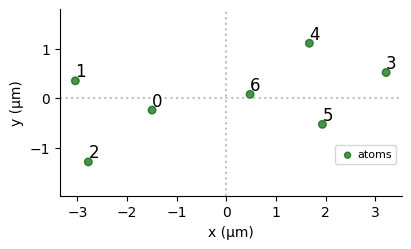

In [13]:
chain.draw()


original interactions [[0.         0.3655409  0.3655409  0.04386491 0.08435559 0.08435559
  0.25      ]
 [0.3655409  0.         0.3655409  0.02550285 0.04386491 0.0391651
  0.08022302]
 [0.3655409  0.3655409  0.         0.02550285 0.0391651  0.04386491
  0.08022302]
 [0.04386491 0.02550285 0.02550285 0.         0.3655409  0.3655409
  0.12989251]
 [0.08435559 0.04386491 0.0391651  0.3655409  0.         0.3655409
  0.40232329]
 [0.08435559 0.0391651  0.04386491 0.3655409  0.3655409  0.
  0.40232329]
 [0.25       0.08022302 0.08022302 0.12989251 0.40232329 0.40232329
  0.        ]]
195 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
optimal permutation is
 [3, 4, 5, 6, 0, 2, 1]
original interactions [[0.         0.3655409  0.3655409  0.12989251 0.04386491 0.02550285
  0.02550285]
 [0.3655409  0.         0.3655409  0.40232329 0.08435559 0.0391651
  0.04386491]
 [0.3655409  0.3655409  0.         0.40232329 0.08435559 0.04386491
  0.0391651 ]
 [0.12989251 0.40232329 0.4023232

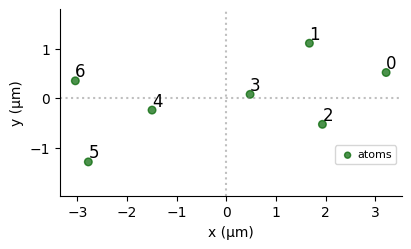

In [14]:
interactions = helpers.reciprocal_dist_matrix(chain)
print("original interactions", interactions)
%timeit optimatrix.minimize_bandwidth(interactions, 20)

optimal_permutation = optimatrix.minimize_bandwidth(interactions, 100)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)
print("original interactions",  helpers.reciprocal_dist_matrix(chain))
chain.draw()

# 8.16
# 8.16 removing copy
# 8.1 removing copying from introducing threshold

optimal permutation is
 [0, 1, 2, 3, 4, 5, 6]


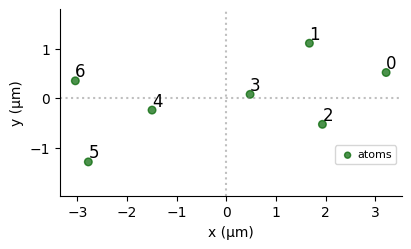

In [15]:
# Second round of optimisation 

interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions,10)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()